In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
DATA_DIR = "mallorn-challenge"
df = pd.read_csv(f"{DATA_DIR}/train_log.csv")
# show columns had dropped
print("Dropped columns:", df.columns[df.isnull().all()].tolist())
df = df.dropna(axis=1, how='all')

Dropped columns: ['Z_err']


In [3]:
df.head(), df.shape

(                  object_id       Z    EBV SpecType  \
 0  Dornhoth_fervain_onodrim  3.0490  0.110      AGN   
 1       Dornhoth_galadh_ylf  0.4324  0.058    SN II   
 2      Elrim_melethril_thul  0.4673  0.577      AGN   
 3        Ithil_tobas_rodwen  0.6946  0.012      AGN   
 4       Mirion_adar_Druadan  0.4161  0.058      AGN   
 
                                English Translation     split  target  
 0  Trawn Folk (Dwarfs) + northern + Ents (people)   split_01       0  
 1    Trawn Folk (Dwarfs) + tree + drinking vessel   split_01       0  
 2                  Elves +  lover (fem.)  + breath  split_01       0  
 3                    moon +  roof  +  noble maiden  split_01       0  
 4            jewel, Silmaril  + father + Wild Man   split_01       0  ,
 (3043, 7))

In [10]:
from tokenize import Ignore


def process_data_pipeline(base_df, is_train=True, splits=range(1, 21), lookup_df=None):
    """Merge all split files with lookup columns from the full log dataframe."""
    file_name = "train_full_lightcurves.csv" if is_train else "test_full_lightcurves.csv"
    lookup_source = lookup_df if lookup_df is not None else base_df
    cols = ["object_id", "Z", "EBV"] + (["target"] if is_train else [])
    lookup = lookup_source[cols]

    parts = []
    for i in splits:
        split_path = os.path.join(DATA_DIR, f"split_{i:02d}", file_name)
        if not os.path.exists(split_path):
            continue
        chunk_df = pd.read_csv(split_path)
        chunk_df = chunk_df.merge(lookup, on="object_id", how="left")
        print(f"Processed split_{i:02d}, shape: {chunk_df.shape}")
        parts.append(chunk_df)

    if not parts:
        raise ValueError("No data files found.")

    compiled = pd.concat(parts, axis=0, ignore_index=True)
    return compiled


In [11]:
df = process_data_pipeline(df, is_train=True, splits=range(1, 21))


Processed split_01, shape: (7945210, 8)
Processed split_02, shape: (4902675, 8)
Processed split_03, shape: (21676, 8)
Processed split_04, shape: (22898, 8)
Processed split_05, shape: (25934, 8)
Processed split_06, shape: (25684, 8)
Processed split_07, shape: (24473, 8)
Processed split_08, shape: (25571, 8)
Processed split_09, shape: (19690, 8)
Processed split_10, shape: (25151, 8)
Processed split_11, shape: (22927, 8)
Processed split_12, shape: (25546, 8)
Processed split_13, shape: (23203, 8)
Processed split_14, shape: (25706, 8)
Processed split_15, shape: (23972, 8)
Processed split_16, shape: (25173, 8)
Processed split_17, shape: (22705, 8)
Processed split_18, shape: (21536, 8)
Processed split_19, shape: (22087, 8)
Processed split_20, shape: (23519, 8)


In [12]:
# tranform list of dataframe to single dataframe
df.shape

(13275336, 8)

In [8]:
print(df.head()),type(df)

                  object_id  Time (MJD)       Flux  Flux_err Filter      Z  \
0  Dornhoth_fervain_onodrim  63314.4662  -1.630159  0.365777      z  3.049   
1  Dornhoth_fervain_onodrim  63780.9674  10.499389  0.253867      r  3.049   
2  Dornhoth_fervain_onodrim  63789.7693   5.866250  1.559241      y  3.049   
3  Dornhoth_fervain_onodrim  63794.1702   3.903623  0.376854      r  3.049   
4  Dornhoth_fervain_onodrim  63794.1702   5.226644  0.516864      i  3.049   

    EBV  target  
0  0.11       0  
1  0.11       0  
2  0.11       0  
3  0.11       0  
4  0.11       0  


(None, pandas.core.frame.DataFrame)

In [22]:
print("Unique object_id count:", df['object_id'].nunique())


Unique object_id count: 3043


In [34]:
data_just_target_true = df[df['target'] == 1]
print("Unique object_id count:", data_just_target_true['object_id'].nunique())
print("Sample object_ids:", data_just_target_true['object_id'].unique()[:20])
data_just_target_true.head(20)


Unique object_id count: 24
Sample object_ids: ['amon_imloth_luin' 'drafn_araf_ryn' 'elu_rusc_nath' 'hervess_hend_lam'
 'imrad_achas_glamor' 'mithril_suil_cugu' 'pent_agor_bronwe'
 'raef_hud_baug' 'ram_thavron_rusc' 'suil_sogannen_bain' 'thamas_hud_cuil'
 'tobas_Elrim_salph' 'Druadan_rodwen_bragol' 'Elrim_harad_menel'
 'angos_rochir_aras' 'gaurwaith_tamin_ungol' 'gwarth_bellas_glamor'
 'harad_tirith_mithren' 'helegnen_faradrim_cae' 'hud_bregedur_rist']


,object_id,Time (MJD),Flux,Flux_err,Filter,Z,EBV,target
799987,amon_imloth_luin,-6.362250e+25,2.657700,0.255077,i,0.7766,0.055,1.0
800106,amon_imloth_luin,-3.922560e+25,1.314073,0.101607,r,0.7766,0.055,1.0
800225,amon_imloth_luin,-5.874310e+25,3.549463,0.475724,z,0.7766,0.055,1.0
800344,amon_imloth_luin,-4.654470e+25,1.443035,0.206576,r,0.7766,0.055,1.0
800463,amon_imloth_luin,-3.922560e+25,1.492297,0.150162,i,0.7766,0.055,1.0
800582,amon_imloth_luin,-2.458750e+25,4.174057,1.002967,y,0.7766,0.055,1.0
800701,amon_imloth_luin,-3.434630e+25,0.399222,0.097840,g,0.7766,0.055,1.0
800820,amon_imloth_luin,-3.434630e+25,1.008752,0.169859,r,0.7766,0.055,1.0
800939,amon_imloth_luin,-3.434630e+25,2.160418,0.369230,z,0.7766,0.055,1.0
801058,amon_imloth_luin,-2.458750e+25,1.911690,0.482294,z,0.7766,0.055,1.0


0          -0.648557
65         -0.182055
130        -0.173254
195        -0.168853
260        -0.168853
              ...   
13275331   -0.472965
13275332   -0.468234
13275333   -0.432750
13275334   -0.638559
13275335    0.660168
Name: Time (MJD), Length: 479384, dtype: float64

In [53]:
# Drop exact duplicate rows and refresh target==1 subset
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Dropped {before - after} duplicate rows; remaining {after}")

data_just_target_true = df[df['target'] == 1]
print("Unique object_id count (target==1):", data_just_target_true['object_id'].nunique())
print("Sample object_ids:", data_just_target_true['object_id'].unique()[:20])

Dropped 0 duplicate rows; remaining 479384
Unique object_id count (target==1): 24
Sample object_ids: ['amon_imloth_luin' 'drafn_araf_ryn' 'elu_rusc_nath' 'hervess_hend_lam'
 'imrad_achas_glamor' 'mithril_suil_cugu' 'pent_agor_bronwe'
 'raef_hud_baug' 'ram_thavron_rusc' 'suil_sogannen_bain' 'thamas_hud_cuil'
 'tobas_Elrim_salph' 'Druadan_rodwen_bragol' 'Elrim_harad_menel'
 'angos_rochir_aras' 'gaurwaith_tamin_ungol' 'gwarth_bellas_glamor'
 'harad_tirith_mithren' 'helegnen_faradrim_cae' 'hud_bregedur_rist']


In [41]:
# df["Time (MJD)"] = (df["Time (MJD)"] - 60000) / ( 10**9)
df["Time (MJD)"]

0          -0.648557
65         -0.182055
130        -0.173254
195        -0.168853
260        -0.168853
              ...   
13275331   -0.472965
13275332   -0.468234
13275333   -0.432750
13275334   -0.638559
13275335    0.660168
Name: Time (MJD), Length: 479384, dtype: float64

Found records per object_id (target==1):
object_id
Druadan_rodwen_bragol    125
Elrim_harad_menel        154
amon_imloth_luin         119
angos_rochir_aras        192
drafn_araf_ryn           171
elu_rusc_nath            178
gaurwaith_tamin_ungol    147
gwarth_bellas_glamor     124
harad_tirith_mithren     172
helegnen_faradrim_cae    165
hervess_hend_lam          73
hud_bregedur_rist        147
imrad_achas_glamor       185
mithril_suil_cugu        175
pent_agor_bronwe          76
raef_hud_baug            173
ram_thavron_rusc         159
suil_sogannen_bain       152
thamas_hud_cuil          159
tobas_Elrim_salph        180
dtype: int64


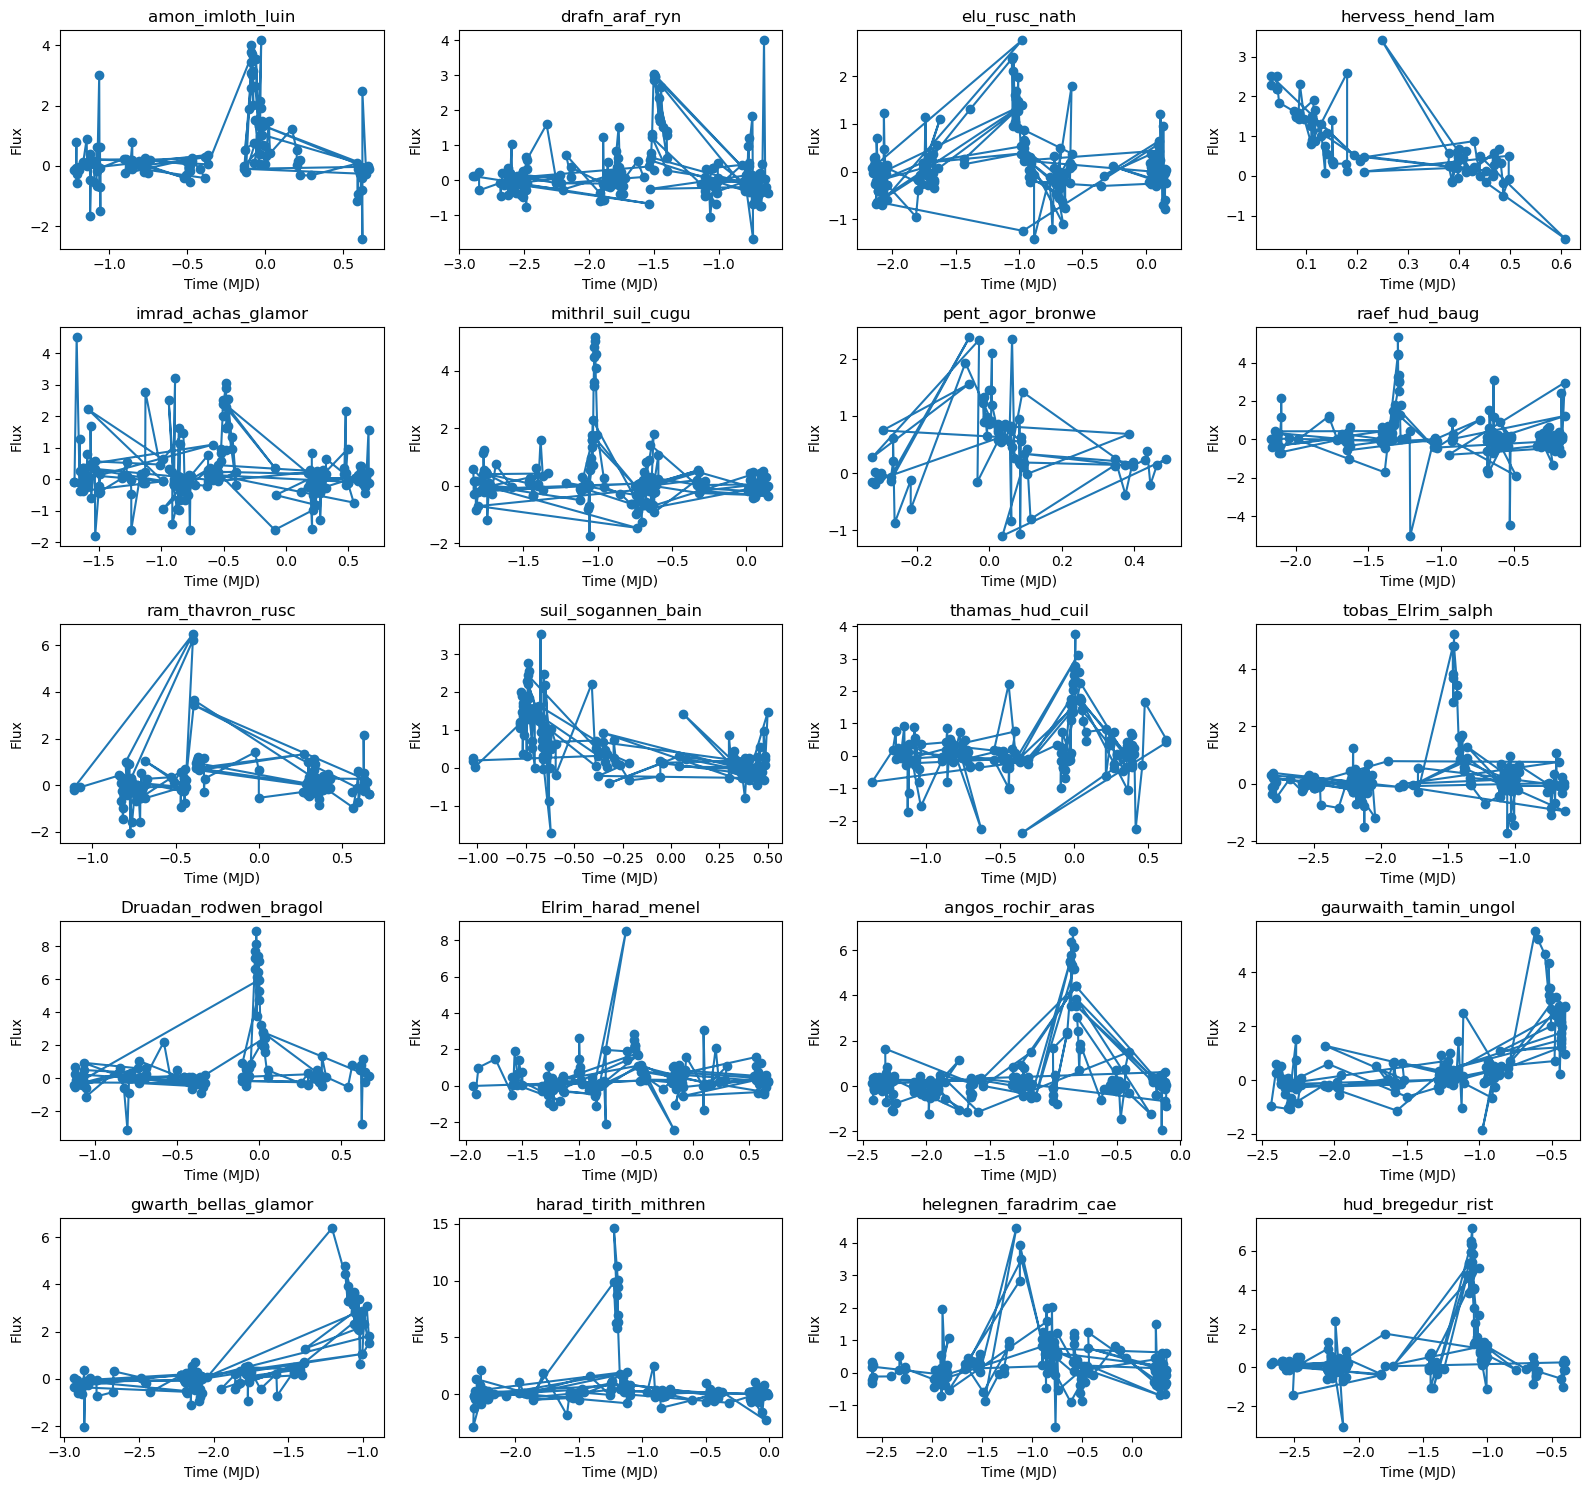

In [54]:
# Plot Flux vs Time (MJD) for selected object_ids with target==1
selected_ids = [
    'amon_imloth_luin', 'drafn_araf_ryn', 'elu_rusc_nath', 'hervess_hend_lam',
    'imrad_achas_glamor', 'mithril_suil_cugu', 'pent_agor_bronwe', 'raef_hud_baug',
    'ram_thavron_rusc', 'suil_sogannen_bain', 'thamas_hud_cuil', 'tobas_Elrim_salph',
    'Druadan_rodwen_bragol', 'Elrim_harad_menel', 'angos_rochir_aras',
    'gaurwaith_tamin_ungol', 'gwarth_bellas_glamor', 'harad_tirith_mithren',
    'helegnen_faradrim_cae', 'hud_bregedur_rist'
]

subset = df[(df['target'] == 1) & (df['object_id'].isin(selected_ids))]
print("Found records per object_id (target==1):")
print(subset.groupby('object_id').size())

n = len(selected_ids)
cols = 4
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows), sharex=False, sharey=False)
axes = axes.flatten()

for ax, oid in zip(axes, selected_ids):
    s = subset[subset['object_id'] == oid]
    if s.empty:
        ax.set_title(f"{oid}\n(no data)")
        ax.axis('off')
        continue
    ax.plot(s['Time (MJD)'], s['Flux'], marker='o', linestyle='-', label=oid)
    ax.set_title(oid)
    ax.set_xlabel('Time (MJD)')
    ax.set_ylabel('Flux')

# Hide unused subplots if any
for ax in axes[len(selected_ids):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [45]:
# Drop exact duplicate rows and refresh target==1 subset
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Dropped {before - after} duplicate rows; remaining {after}")

data_just_target_false = df[df['target'] == 0]
print("Unique object_id count (target==0):", data_just_target_false['object_id'].nunique())
print("Sample object_ids:", data_just_target_false['object_id'].unique()[:20])

Dropped 0 duplicate rows; remaining 479384
Unique object_id count (target==0): 301
Sample object_ids: ['Dornhoth_fervain_onodrim' 'Dornhoth_galadh_ylf' 'Elrim_melethril_thul'
 'Ithil_tobas_rodwen' 'Mirion_adar_Druadan' 'Mirion_lalaith_neledh'
 'Rochirrim_lebdas_pethron' 'acharn_lend_Mithrim' 'achas_iar_gaur'
 'aduial_nur_luith' 'amath_gwador_helegnen' 'amlug_loss_ang'
 'andrann_puig_fern' 'ang_cugu_harad' 'ang_neledh_aith'
 'angos_rusc_curunir' 'annon_adab_lossen' 'araf_hub_faun'
 'aras_ryn_manadh' 'badhor_graw_aiglos']


Found records per object_id (target==0):
object_id
Dornhoth_fervain_onodrim     65
Dornhoth_galadh_ylf         167
Elrim_melethril_thul         35
Ithil_tobas_rodwen          798
Mirion_adar_Druadan         129
Mirion_lalaith_neledh       119
Rochirrim_lebdas_pethron    138
acharn_lend_Mithrim         108
achas_iar_gaur              162
aduial_nur_luith            103
amath_gwador_helegnen       140
amlug_loss_ang              109
andrann_puig_fern           159
ang_cugu_harad              139
ang_neledh_aith             100
angos_rusc_curunir          141
annon_adab_lossen            47
araf_hub_faun               719
aras_ryn_manadh             185
badhor_graw_aiglos           90
dtype: int64


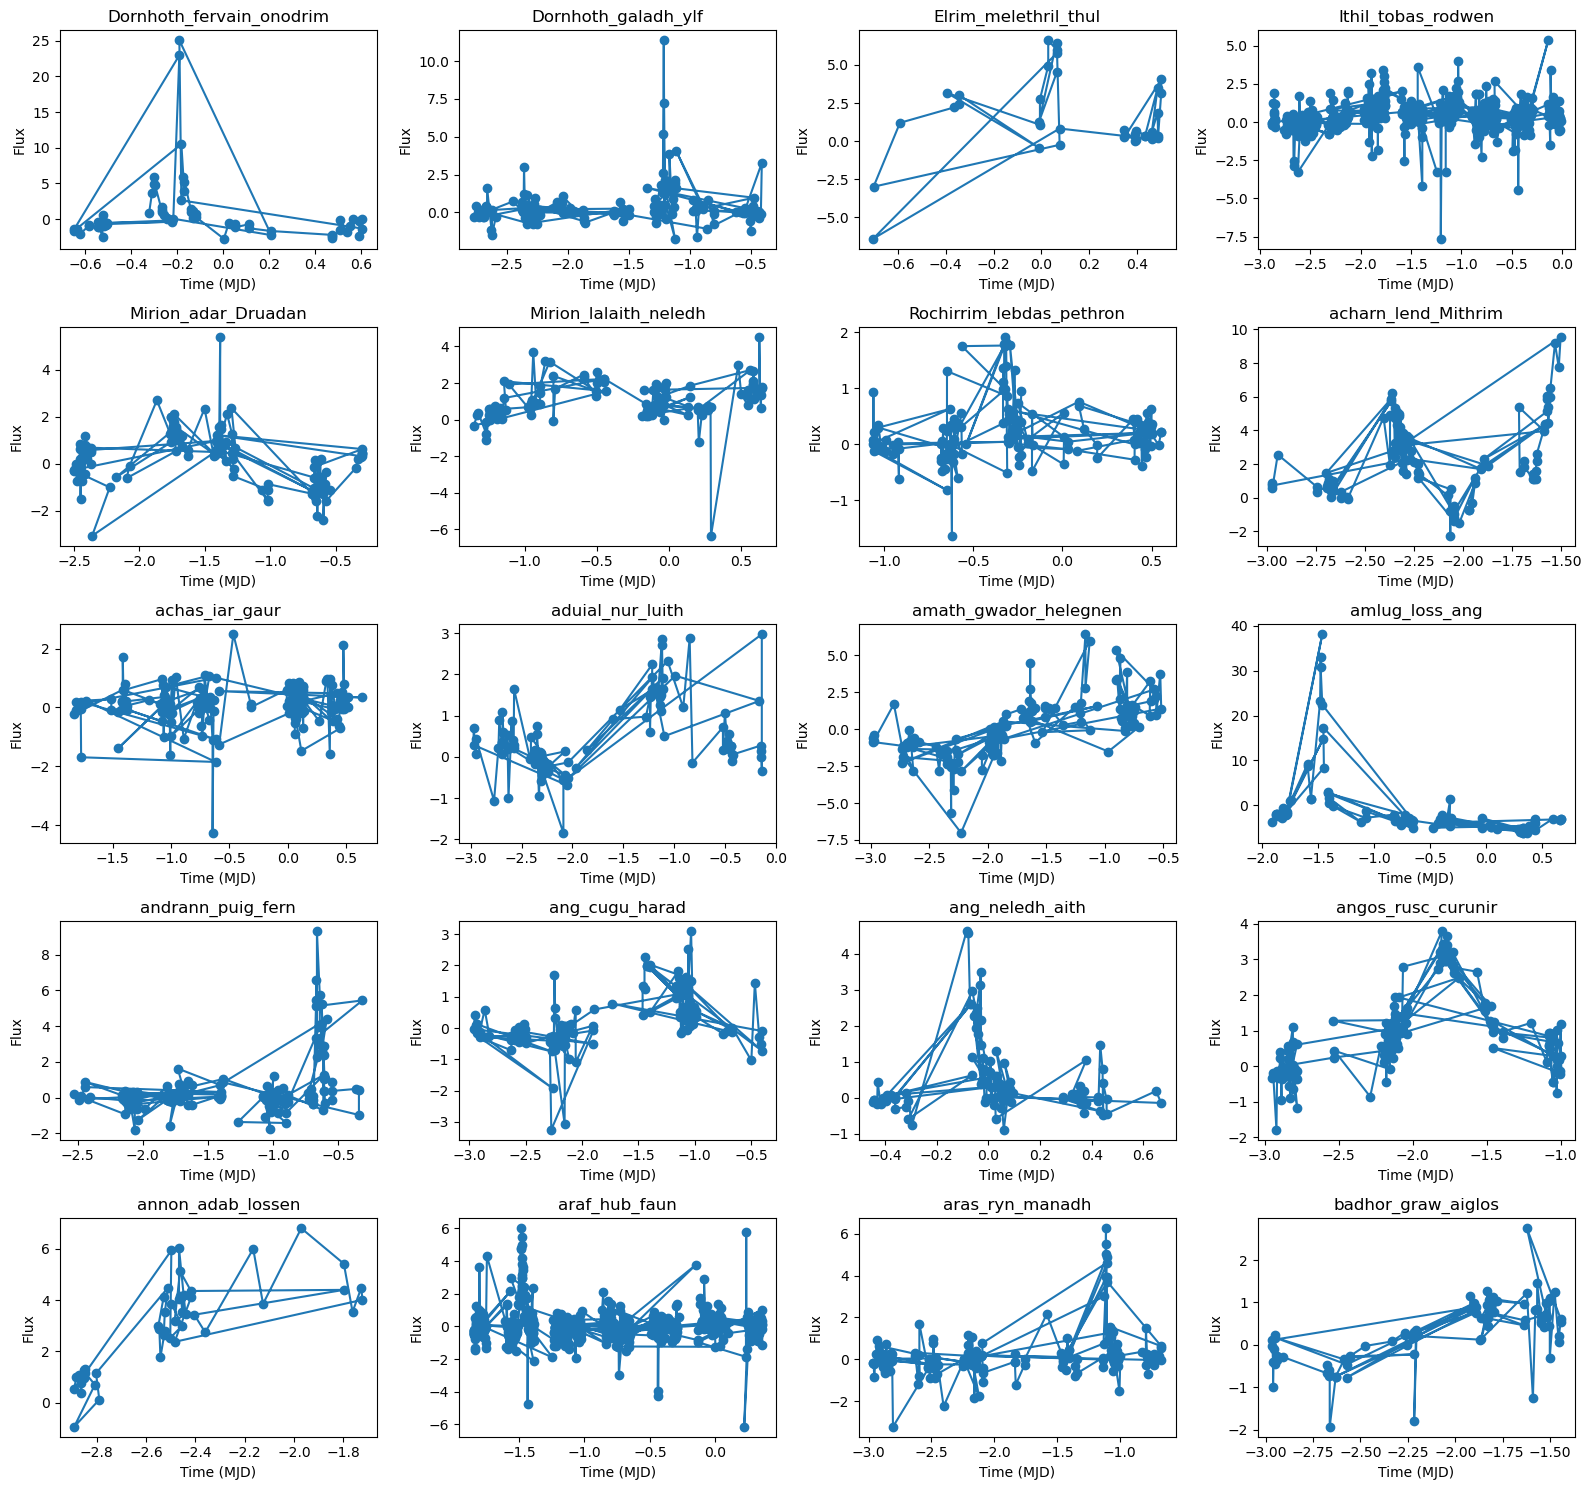

In [51]:
# Plot Flux vs Time (MJD) for selected object_ids with target==1
selected_ids = ['Dornhoth_fervain_onodrim', 'Dornhoth_galadh_ylf', 'Elrim_melethril_thul',
 'Ithil_tobas_rodwen', 'Mirion_adar_Druadan', 'Mirion_lalaith_neledh',
 'Rochirrim_lebdas_pethron', 'acharn_lend_Mithrim', 'achas_iar_gaur',
 'aduial_nur_luith', 'amath_gwador_helegnen', 'amlug_loss_ang',
 'andrann_puig_fern', 'ang_cugu_harad', 'ang_neledh_aith',
 'angos_rusc_curunir', 'annon_adab_lossen', 'araf_hub_faun',
 'aras_ryn_manadh', 'badhor_graw_aiglos']

subset = df[(df['target'] == 0) & (df['object_id'].isin(selected_ids))]
print("Found records per object_id (target==0):")
print(subset.groupby('object_id').size())

n = len(selected_ids)
cols = 4
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows), sharex=False, sharey=False)
axes = axes.flatten()

for ax, oid in zip(axes, selected_ids):
    s = subset[subset['object_id'] == oid]
    if s.empty:
        ax.set_title(f"{oid}\n(no data)")
        ax.axis('off')
        continue
    ax.plot(s['Time (MJD)'], s['Flux'], marker='o', linestyle='-', label=oid)
    ax.set_title(oid)
    ax.set_xlabel('Time (MJD)')
    ax.set_ylabel('Flux')

# Hide unused subplots if any
for ax in axes[len(selected_ids):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [57]:
data_just_target_true.to_csv("data_just_target_true.csv", index=False)

In [58]:
data_just_target_false.to_csv("data_just_target_false.csv", index=False)

In [61]:
data_just_target_false.head(20)

,object_id,Time (MJD),Flux,Flux_err,Filter,Z,EBV,target
0,Dornhoth_fervain_onodrim,-0.648557,-1.630159,0.365777,z,3.049,0.11,0.0
65,Dornhoth_fervain_onodrim,-0.182055,10.499389,0.253867,r,3.049,0.11,0.0
130,Dornhoth_fervain_onodrim,-0.173254,5.866250,1.559241,y,3.049,0.11,0.0
195,Dornhoth_fervain_onodrim,-0.168853,3.903623,0.376854,r,3.049,0.11,0.0
260,Dornhoth_fervain_onodrim,-0.168853,5.226644,0.516864,i,3.049,0.11,0.0
325,Dornhoth_fervain_onodrim,-0.138046,0.984804,0.109919,g,3.049,0.11,0.0
390,Dornhoth_fervain_onodrim,-0.138046,1.485012,0.181529,r,3.049,0.11,0.0
455,Dornhoth_fervain_onodrim,-0.133645,0.170766,0.551879,u,3.049,0.11,0.0
520,Dornhoth_fervain_onodrim,-0.133645,1.183222,0.208419,r,3.049,0.11,0.0
585,Dornhoth_fervain_onodrim,-0.120442,0.725684,0.533212,i,3.049,0.11,0.0
